In [1]:
!pip install python-doctr -q
!pip install ultralytics  -q
!pip install Levenshtein -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run "/content/drive/MyDrive/poly-scan-ID/notebooks/CRAFT_OCR.ipynb" -q

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


  0%|          | 0/59214222 [00:00<?, ?it/s]

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



image 1/1 /content/drive/MyDrive/CRAFT-ORC-ID/id-data/id_card1.jpg: 448x640 2 persons, 1 book, 3002.1ms
Speed: 13.3ms preprocess, 3002.1ms inference, 38.0ms postprocess per image at shape (1, 3, 448, 640)


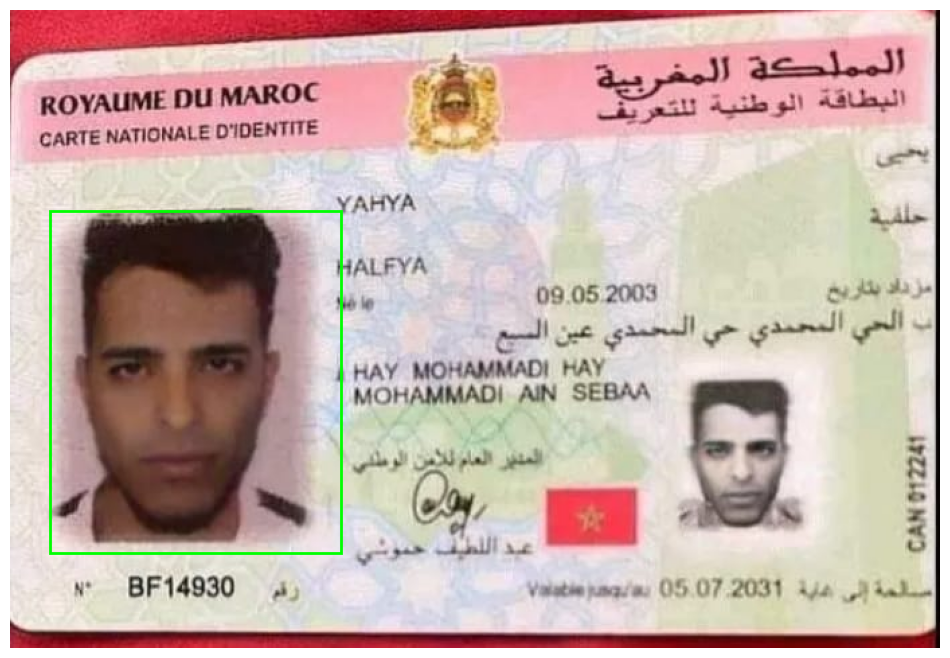

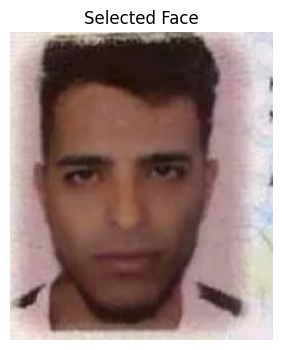

In [ ]:
def plot_single_face(image_path, face, crop):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, figsize=(12, 10))
    ax.imshow(image_rgb)

    if face is not None:
        x0, y0, x1, y1 = face
        rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0,
                                 linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

    if crop is not None:
        crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(crop_rgb)
        plt.title("Selected Face")
        plt.axis('off')
        plt.show()

path = paths[1]

face_box, face_crop = detect_face(path)
plot_single_face(path, face_box, face_crop)


In [ ]:
path = "/content/WhatsApp Image 2025-09-08 à 01.06.14_87955b48.jpg"
# Load image and detect text regions
image, boxes, polys = detect_text(predictor, path)

# Crop front/back sections from the ID
crops = crop_id_card(image, boxes)

# Run OCR on the full image
ocr_results = run_ocr(image)

# Keep only Arabic and French text blocks
filtered_texts = filter_ocr_with_classification(
    ocr_results,
    image,
    model,
    ['Arabic', 'French'],
    test_transform
)

# Show the original image
plot_ocr_results(image, ocr_results)

FileNotFoundError: unable to access /content/WhatsApp Image 2025-09-08 à 01.06.14_87955b48.jpg

In [ ]:
doc_type = classify_card_type(filtered_texts)
print(f"Detected document type: {doc_type}")

if doc_type == "passport":
    info = extract_passport_info(filtered_texts)
elif doc_type == "permis_de_conduire":
    info = extract_permis_info(filtered_texts, ocr_results)
elif doc_type == "id_card_front":
    info = extract_id_info(filtered_texts)
elif doc_type == "id_card_back":
    info = extract_idback_info(filtered_texts)
else:
    info = None

info

In [ ]:
filtered_texts

In [ ]:
!pip install streamlit pyngrok -q

In [ ]:
!ngrok authtoken 2yZ7CdTVV0Ht1SNXChMwSsa98Ka_2ewGRx5PijgVhFEntCUBR

In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)

print(f"Streamlit app URL: {public_url}")

!streamlit run /content/drive/MyDrive/poly-scan-ID/src/app.py &